In [1]:
import os
import sys
import urllib.request
import datetime
import time
import json

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager,rc
import cx_Oracle
import pymysql

In [2]:
def get_request_url(url):
    req=urllib.request.Request(url)
    try:
        response=urllib.request.urlopen(req)
        if response.getcode()==200:
            print("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')

    except Exception as e:
        print(e)
        print("[%s] Error for URL:%s" %(datetime.datetime.now(),url))
        return None


In [3]:
def getNatVisitor(yyyymm,nat_cd,ed_cd):
    end_point="http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList"
    access_key="ZlQL419D9IcCoR5oBoHiu0ELHc%2FGUF6w6C6Zucbn7ggF%2Bai2Azd9ATBYDaGJhqvM%2Fr%2FA1Bw5p9y3pqVKI1Z0Ng%3D%3D"
    
    parameters = "?_type=json&serviceKey="+access_key
    parameters += "&YM="+yyyymm
    parameters += "&NAT_CD="+nat_cd
    parameters += "&ED_CD="+ed_cd
    
    url = end_point + parameters
    
    retData = get_request_url(url)
    
    if(retData==None):
        return None
    else:
        return json.loads(retData)
    

In [ ]:
def oracle_save(krName,yyyymm,iTotalVisit):
    conn=cx_Oracle.connect("pgm/1234@localhost:1521/orcl")
    cursor=conn.cursor()
    sql="insert into totvist values(vno_seq.nextval,:1,:2,:3)"
    cursor.execute(sql,(krName,yyyymm,iTotalVisit))
    conn.commit()
    cursor.close()
    conn.close()
    

In [ ]:
def oracle_save(visit_list):
    conn=cx_Oracle.connect("pgm/1234@localhost:1521/orcl")
    cursor=conn.cursor()
    sql="insert into totvist values(vno_seq.nextval,:1,:2,:3)"
    
    #밑에 cursor 두줄과 동일한 코드
    #for visit in visit_list:
    #   cursor.execute(sql,visit)
            
    cursor.arraysize=len(visit_list)
    cursor.executemany(sql,visit_list)
    
    conn.commit()
    cursor.close()
    conn.close()

In [6]:
def mysql_save(krName,yyyymm,iTotalVisit):
    conn=pymysql.connect(host='localhost',user='python',password='12345678',db='pydb',charset='utf8')
    cursor=conn.cursor()
    sql="insert into totVisit(krname,ym,totalvisit) values('%s','%s','%s')" %(krName,yyyymm,iTotalVisit)
    cursor.execute(sql)
    conn.commit()
    cursor.close()
    conn.close()

[2019-11-22 10:40:10.582177] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 275,
                    "natKorNm": "미  국",
                    "num": 44152,
                    "rnum": 1,
                    "ym": 201101
                }
            },
            "numOfRows": 10,
            "pageNo": 1,
            "totalCount": 1
        },
        "header": {
            "resultCode": "0000",
            "resultMsg": "OK"
        }
    }
}
미국_201101 : 44152
[2019-11-22 10:40:10.846930] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 275,
                    "natKorNm": "미  국",
                    "num": 43500,
                    "rnum": 1,
                    "ym": 20110

[2019-11-22 10:40:12.312291] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 275,
                    "natKorNm": "미  국",
                    "num": 64972,
                    "rnum": 1,
                    "ym": 201205
                }
            },
            "numOfRows": 10,
            "pageNo": 1,
            "totalCount": 1
        },
        "header": {
            "resultCode": "0000",
            "resultMsg": "OK"
        }
    }
}
미국_201205 : 64972
[2019-11-22 10:40:12.397255] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 275,
                    "natKorNm": "미  국",
                    "num": 66049,
                    "rnum": 1,
                    "ym": 20120

[2019-11-22 10:40:13.773627] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 275,
                    "natKorNm": "미  국",
                    "num": 59353,
                    "rnum": 1,
                    "ym": 201308
                }
            },
            "numOfRows": 10,
            "pageNo": 1,
            "totalCount": 1
        },
        "header": {
            "resultCode": "0000",
            "resultMsg": "OK"
        }
    }
}
미국_201308 : 59353
[2019-11-22 10:40:13.855609] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 275,
                    "natKorNm": "미  국",
                    "num": 62646,
                    "rnum": 1,
                    "ym": 20130

[2019-11-22 10:40:15.135028] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 275,
                    "natKorNm": "미  국",
                    "num": 58709,
                    "rnum": 1,
                    "ym": 201411
                }
            },
            "numOfRows": 10,
            "pageNo": 1,
            "totalCount": 1
        },
        "header": {
            "resultCode": "0000",
            "resultMsg": "OK"
        }
    }
}
미국_201411 : 58709
[2019-11-22 10:40:15.213989] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 275,
                    "natKorNm": "미  국",
                    "num": 55001,
                    "rnum": 1,
                    "ym": 20141

[2019-11-22 10:40:16.956218] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 275,
                    "natKorNm": "미  국",
                    "num": 50705,
                    "rnum": 1,
                    "ym": 201602
                }
            },
            "numOfRows": 10,
            "pageNo": 1,
            "totalCount": 1
        },
        "header": {
            "resultCode": "0000",
            "resultMsg": "OK"
        }
    }
}
미국_201602 : 50705
[2019-11-22 10:40:17.056202] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 275,
                    "natKorNm": "미  국",
                    "num": 68719,
                    "rnum": 1,
                    "ym": 20160

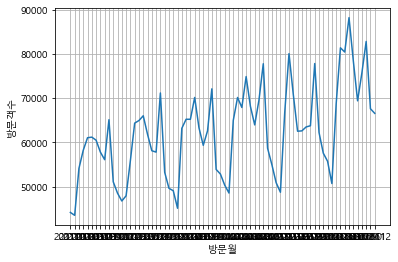

In [7]:
def main():
    
    jsonResult=[]
    
    national_code ="275"
    ed_cd="E"
    
    nStartYear=2011
    nEndYear=2017
    krName=""
    visit_list=[]
    
    for year in range(nStartYear, nEndYear):
        for month in range(1,13):
            
            yyyymm="{0}{1:0>2}".format(str(year),str(month))
            
            jsonData = getNatVisitor(yyyymm,national_code,ed_cd)
            
            print(json.dumps(jsonData,
                            indent=4,sort_keys=True,
                            ensure_ascii=False))
            
            if (jsonData['response']['header']['resultMsg'] == 'OK'):
                krName = jsonData['response']['body']['items']['item']["natKorNm"]
                krName = krName.replace(' ', '')
                iTotalVisit = jsonData['response']['body']['items']['item']["num"]
                print('%s_%s : %s' %(krName, yyyymm, iTotalVisit))
                jsonResult.append({'nat_name': krName, 'nat_cd': national_code,
                                 'yyyymm': yyyymm, 'visit_cnt': iTotalVisit})
                #oracle_save(krName,yyyymm,iTotalVisit)
                mysql_save(krName,yyyymm,iTotalVisit)
                
                #한번에 데이터 가져와서 디비에 저장
                #visit=[krName,yyyymm,iTotalVisit]
                #visit_list.append(tuple(visit))
        
        #oracle_save(visit_list)
        
        
        cnVisit=[]
        VisitYM=[]
        index=[]
        i=0
        for item in jsonResult:
            index.append(i)
            cnVisit.append(item['visit_cnt'])
            VisitYM.append(item['yyyymm'])
            i=i+1
        with open('%s(%s)_해외방문객정보_%d_%d.json'
                  %(krName,national_code,nStartYear,nEndYear-1),'w',encoding='utf8') as outfile:
            retJson = json.dumps(jsonResult,indent=4,sort_keys=True,ensure_ascii=False)
            outfile.write(retJson)
    
    font_location = "c:/Windows/fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font', family=font_name)

    plt.xticks(index, VisitYM)
    plt.plot(index, cnVisit)
    plt.xlabel('방문월')
    plt.ylabel('방문객수')
    plt.grid(True)
    plt.show()           
    
if __name__ == '__main__':
    main()
